In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

In [2]:
#read csv file
df=pd.read_csv("bank-full.csv")

In [7]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
df=pd.read_csv("bank-full.csv",sep=';')

In [5]:
df.groupby('y').mean()

,age,balance,day,duration,campaign,pdays,previous
y,,,,,,,
no,40.838986,1303.714969,15.892290,221.182806,2.846350,36.421372,0.502154
yes,41.670070,1804.267915,15.158253,537.294574,2.141047,68.702968,1.170354


In [6]:
df['y'].value_counts()

no     39922
yes     5289
Name: y, dtype: int64

In [8]:
df['default'] = df['default'].map( 
                   {'yes':1 ,'no':0}) 
df['housing'] = df['housing'].map( 
                   {'yes':1 ,'no':0}) 
df['loan'] = df['loan'].map( 
                   {'yes':1 ,'no':0}) 
df['y'] = df['y'].map( 
                   {'yes':1 ,'no':0}) 

In [9]:
df = df.drop(columns = ['job', 'marital', 'education','contact', 'month', 'poutcome'])
df.head()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,y
0,58,0,2143,1,0,5,261,1,-1,0,0
1,44,0,29,1,0,5,151,1,-1,0,0
2,33,0,2,1,1,5,76,1,-1,0,0
3,47,0,1506,1,0,5,92,1,-1,0,0
4,33,0,1,0,0,5,198,1,-1,0,0


In [10]:
y = df.y.values
x = df.drop(['y'], axis=1)

In [13]:
#1
# normalize
x = (x - np.min(x)) / (np.max(x) - np.min(x)).values
x

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous
0,0.519481,0.0,0.092259,1.0,0.0,0.133333,0.053070,0.000000,0.000000,0.000000
1,0.337662,0.0,0.073067,1.0,0.0,0.133333,0.030704,0.000000,0.000000,0.000000
2,0.194805,0.0,0.072822,1.0,1.0,0.133333,0.015453,0.000000,0.000000,0.000000
3,0.376623,0.0,0.086476,1.0,0.0,0.133333,0.018707,0.000000,0.000000,0.000000
4,0.194805,0.0,0.072812,0.0,0.0,0.133333,0.040260,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...
45206,0.428571,0.0,0.080293,0.0,0.0,0.533333,0.198658,0.032258,0.000000,0.000000
45207,0.688312,0.0,0.088501,0.0,0.0,0.533333,0.092721,0.016129,0.000000,0.000000
45208,0.701299,0.0,0.124689,0.0,0.0,0.533333,0.229158,0.064516,0.212156,0.010909
45209,0.506494,0.0,0.078868,0.0,0.0,0.533333,0.103294,0.048387,0.000000,0.000000


In [14]:
#  train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state=0)

In [16]:
#transpose matrices
x_train = x_train.T
y_train = y_train.T
x_test = x_test.T
y_test = y_test.T

In [17]:
accuracies = {}

lr = LogisticRegression()
lr.fit(x_train.T,y_train.T)
acc = lr.score(x_test.T,y_test.T)*100

accuracies['Logistic Regression'] = acc

In [18]:
acc

88.80902355413026

In [19]:
#2 
classifier = LogisticRegression()
classifier.fit(x,y)

LogisticRegression()

In [20]:
y_pred=classifier.predict_proba(x)

In [21]:
y_pred=classifier.predict(x)

In [23]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y,y_pred)
print(confusion_matrix)

[[39274   648]
 [ 4354   935]]


In [24]:
accuracy=((39274+935)/(39274+935+4354+648))*100
accuracy

88.93632080688329

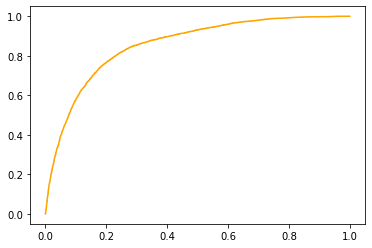

In [25]:
from  sklearn.metrics import roc_curve
from  sklearn.metrics import roc_auc_score

fpr,tpr,thresholds = roc_curve(y,classifier.predict_proba(x)[:,1])

auc=roc_auc_score(y,y_pred)

import matplotlib.pyplot as plt
plt.plot(fpr,tpr,color='orange',label='logic model (area=%0.2f)'%auc)
plt.show()